In [4]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Machine Learning - Classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)
from scipy import stats

## Load and Inspect the Data Set ##

In [37]:
df = pd.read_csv(r'C:\OTHER PARTITIONS\Partition D\ADA - Degree Program\DA 2013 - Data Management\Take Home Assignment 1\HeartFailureDataset.csv',index_col=0)
df

,age,gender,height,weight,ap_hi \n(Systolic blood pressure),ap_lo\n(Diastolic blood pressure),cholesterol,glucose level,smoking status,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76,120,80,1,1,1,0,1,0
99995,22601,1,158,126,140,90,2,2,0,0,1,1
99996,19066,2,183,105,180,90,3,1,0,1,0,1


In [48]:
df.shape
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(70000, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               70000 non-null  int64
 1   gender                            70000 non-null  int64
 2   height                            70000 non-null  int64
 3   weight                            70000 non-null  int64
 4   ap_hi 
(Systolic blood pressure)  70000 non-null  int64
 5   ap_lo
(Diastolic blood pressure)  70000 non-null  int64
 6   cholesterol                       70000 non-null  int64
 7   glucose level                     70000 non-null  int64
 8   smoking status                    70000 non-null  int64
 9   alco                              70000 non-null  int64
 10  active                            70000 non-null  int64
 11  cardio                            70000 non-null  int64
dtypes: int64(12)
memory usage

# Display basic information #

In [ ]:
print(f"Heart Failure Clinical Records Dataset")

print(f"Target Variable: 'cardio' (Binary Classification)")

print("\nFirst 10 Patient Records:\n")
df.head(10)

Heart Failure Clinical Records Dataset
Target Variable: 'cardio' (Binary Classification)

First 10 Patient Records:



,age,gender,height,weight,ap_hi \n(Systolic blood pressure),ap_lo\n(Diastolic blood pressure),cholesterol,glucose level,smoking status,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0
9,22113,1,157,93,130,80,3,1,0,0,1,0
12,22584,2,178,95,130,90,3,3,0,0,1,1
13,17668,1,158,71,110,70,1,1,0,0,1,0


# Check Memory Usage #

In [10]:
# Chech memory usage
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Missing values
print("\n===MISSING VALUES===")
missing_counts = df.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
if len(missing_features) == 0:
    print(f"No missing values in this dataset!")
    print(f"Ready for modeling!")
else:
    print(f"Dataset have missing values:")
    for feat, count in missing_features.items():
        pct = (count / len(df)) * 100
        print(f"      • {feat}: {count:,} ({pct:.2f}%)")


Memory Usage: 6.94 MB

===MISSING VALUES===
No missing values in this dataset!
Ready for modeling!


# Checking for any duplicates #

In [11]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\n===DUPLICATE ROWS===")
if duplicates == 0:
    print("No duplicates found")
else:
    print(f"{duplicates:,} duplicate rows detected")


===DUPLICATE ROWS===
24 duplicate rows detected


Find the duplicate rows

In [26]:
# Find the duplicate rows

duplicate_counts = duplicates.value_counts().reset_index(name='Frequency')
duplicate_counts



,age,gender,height,weight,ap_hi \n(Systolic blood pressure),ap_lo\n(Diastolic blood pressure),cholesterol,glucose level,smoking status,alco,active,cardio,age_years,bmi,Frequency
0,14552,1,158,64,120,80,1,1,0,0,1,0,40,25.636917,2
1,16160,1,168,65,120,80,1,1,0,0,1,1,44,23.030045,2
2,16793,1,165,68,120,80,1,1,0,0,1,0,46,24.977043,2
3,16805,1,157,67,120,80,1,1,0,0,1,0,46,27.181630,2
4,16937,2,170,70,120,80,1,1,0,0,0,0,46,24.221453,2
5,17493,2,169,74,120,80,1,1,0,0,1,1,48,25.909457,2
6,17535,2,165,65,120,80,1,1,0,0,1,0,48,23.875115,2
7,18210,1,160,60,120,80,1,1,0,0,1,0,50,23.437500,2
8,18353,1,169,67,120,80,1,1,0,0,1,0,50,23.458562,2
9,18955,1,165,75,120,80,1,1,0,0,1,1,52,27.548209,2


Check for duplicate IDs

In [ ]:


if 'id' in df.columns:
	duplicate_ids = df[df['id'].duplicated(keep=False)]

# Display duplicate ID rows
print("Rows with duplicate IDs:")
print(duplicate_ids)

# Count how many duplicate IDs exist
if 'id' in df.columns:
	num_duplicates = duplicate_ids['id'].nunique()
else:
	num_duplicates = duplicate_ids.index.nunique()

print(f"Number of duplicate IDs: {num_duplicates}")


Rows with duplicate IDs:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi 
(Systolic blood pressure), ap_lo
(Diastolic blood pressure), cholesterol, glucose level, smoking status, alco, active, cardio, age_years, bmi]
Index: []
Number of duplicate IDs: 0


In [27]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365.25).round(0).astype(int)

# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df


,age,gender,height,weight,ap_hi \n(Systolic blood pressure),ap_lo\n(Diastolic blood pressure),cholesterol,glucose level,smoking status,alco,active,cardio,age_years,bmi
id,,,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64,130,70,3,1,0,0,0,1,52,23.507805
3,17623,2,169,82,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76,120,80,1,1,1,0,1,0,53,26.927438
99995,22601,1,158,126,140,90,2,2,0,0,1,1,62,50.472681
99996,19066,2,183,105,180,90,3,1,0,1,0,1,52,31.353579


In [25]:
# Target variable (CARDIOVASCULAR DISEASE) distribution

print("\nTARGET VARIABLE: Cardio (CARDIOVASCULAR DISEASE Presence)")
if 'cardio' in df.columns:
    cardio_counts = df['cardio'].value_counts().sort_index()
    print(f"="*10 + "Disease Distribution" + "="*10)
    for status, count in cardio_counts.items():
        label = "Healthy" if status == 0 else "Cardio Vascular Disease Present"
        print(f"{label}: {count:,} ({count/len(df)*100:.1f}%)")


TARGET VARIABLE: Cardio (CARDIOVASCULAR DISEASE Presence)
==========Disease Distribution==========
Healthy: 35,021 (50.0%)
Cardio Vascular Disease Present: 34,979 (50.0%)


Target variable distribution
Datasets use 'cardio' as Cardio VAscular Disease (0 = absence, 1 = presence) as the target.

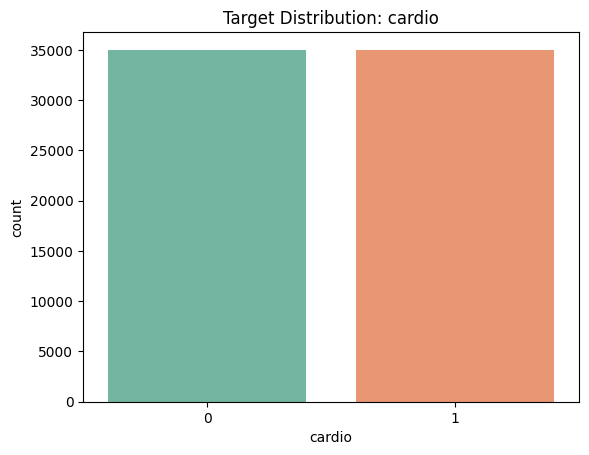

In [52]:
# Use the existing TARGET_COL (or 'cardio') in this dataset

if 'TARGET_COL' in globals() and TARGET_COL in df.columns:
	sns.countplot(x=TARGET_COL, data=df, palette="Set2")
	plt.title(f"Target Distribution: {TARGET_COL}")
	plt.show()
else:
	sns.countplot(x="cardio", data=df, palette="Set2")
	plt.title("Target Distribution: cardio")
	plt.show()


Define target and features, handle types and missing values

Numeric feature distributions

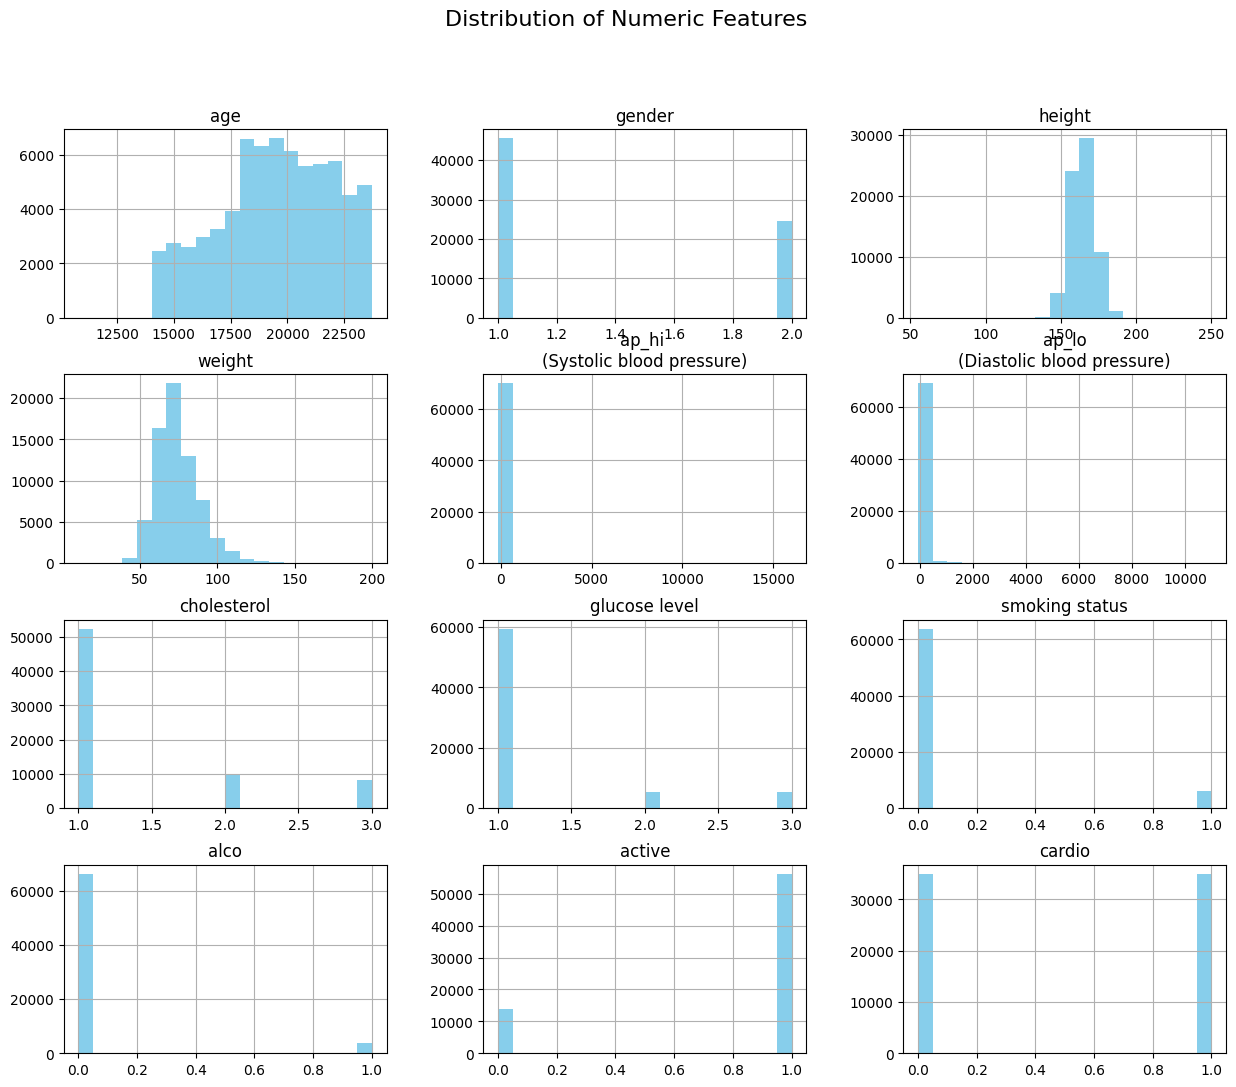

In [53]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

df[numeric_cols].hist(figsize=(15,12), bins=20, color="skyblue")
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

Correlation heatmap

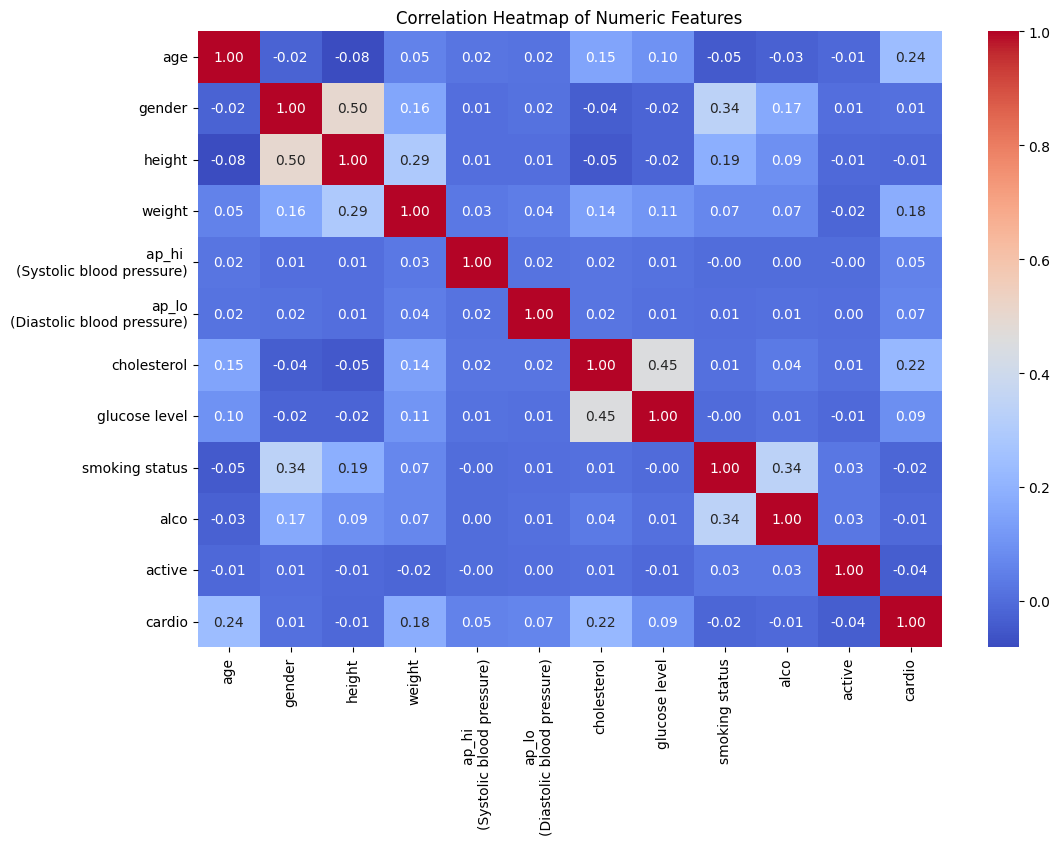

In [54]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Relationship with target

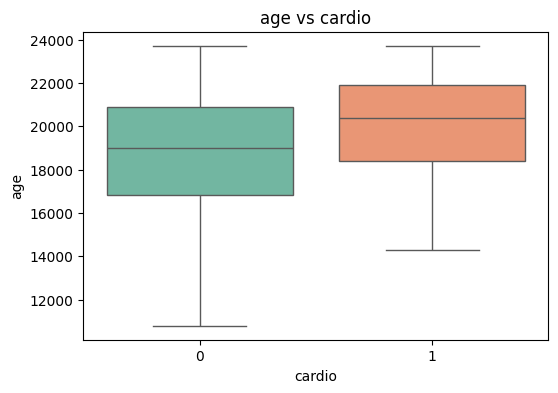

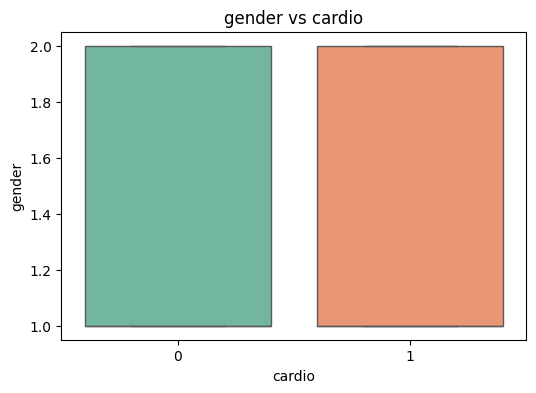

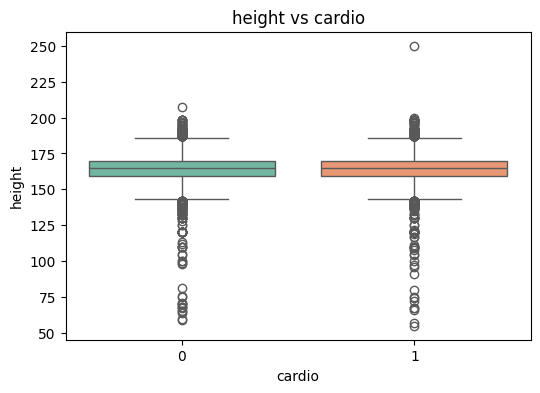

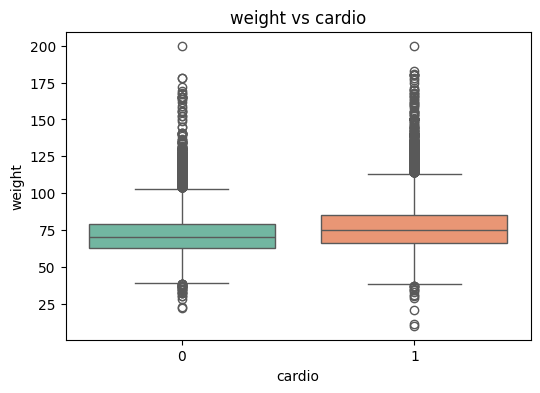

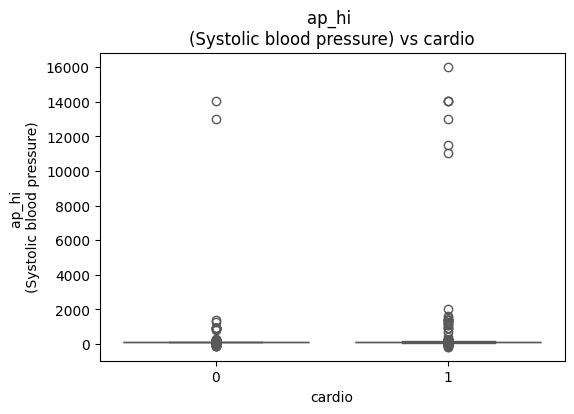

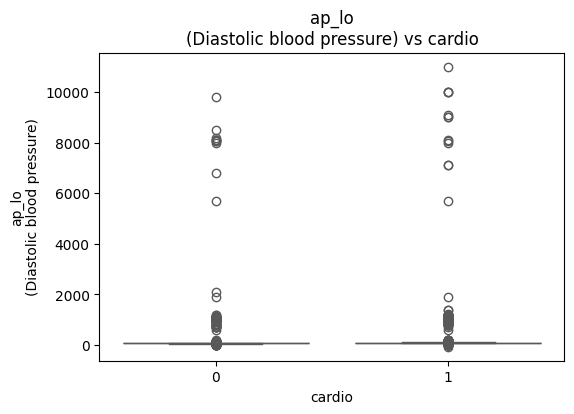

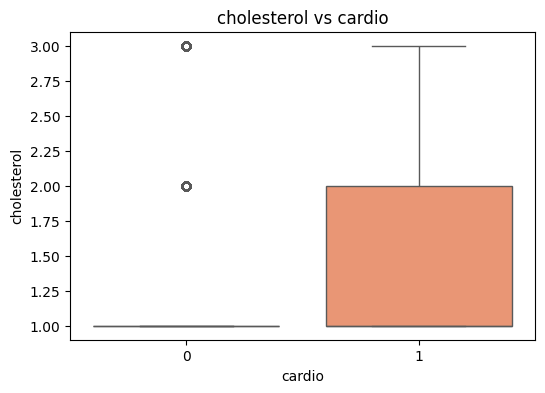

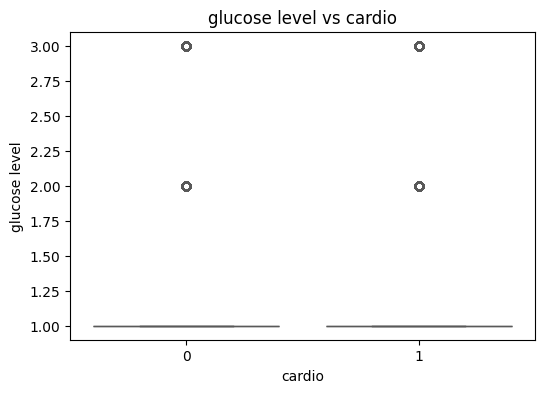

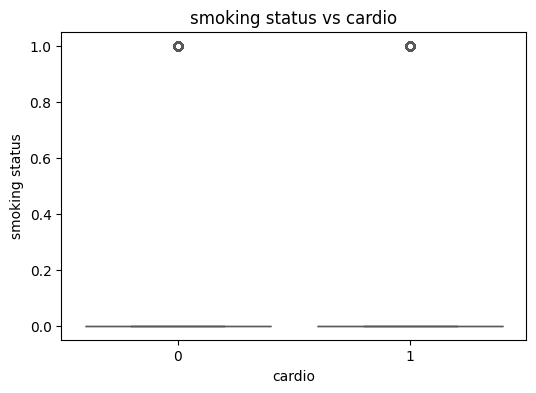

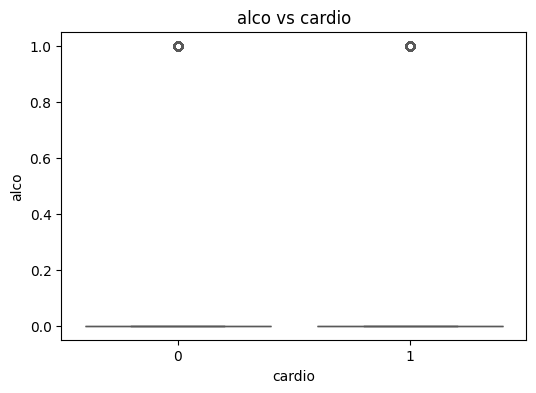

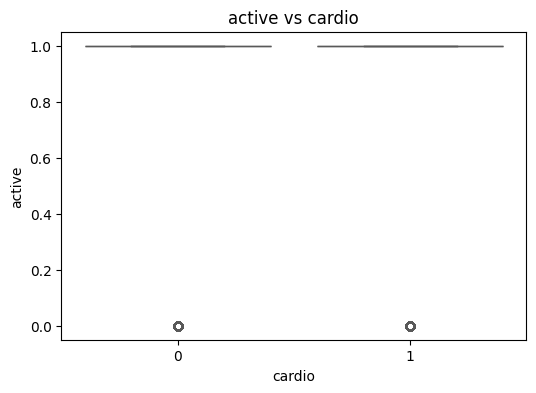

In [59]:
# Plot boxplots of numeric features - Age vs target variable - 'cardio'
for col in [c for c in numeric_cols if c != TARGET_COL]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=TARGET_COL, y=col, data=df, palette="Set2")
    plt.title(f"{col} vs {TARGET_COL}")
    plt.show()

# Define target and features, handle types and missing values

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Set your target column here. Common in heart failure dataset: 'cardio'
df_clean = df.copy()
TARGET_COL = "cardio"

if TARGET_COL not in df_clean.columns:
    raise ValueError("Please set TARGET_COL to the correct target column name.")

# Drop ID from features if present
ID_COL = "id"  # Define ID_COL
feature_cols = [c for c in df_clean.columns if c not in [TARGET_COL, ID_COL] and c != ID_COL]

# Split numeric vs categorical by dtype
numeric_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df_clean[c])]
categorical_cols = [c for c in feature_cols if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Basic missing data handling strategy:
# - Numeric: median imputation
# - Categorical: most frequent imputation
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

# Train-test split (stratified to preserve class balance)
X = df_clean[feature_cols]
y = df_clean[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Numeric columns: ['age', 'gender', 'height', 'weight', 'ap_hi \n(Systolic blood pressure)', 'ap_lo\n(Diastolic blood pressure)', 'cholesterol', 'glucose level', 'smoking status', 'alco', 'active']
Categorical columns: []
Train size: (52500, 11) Test size: (17500, 11)


## Train baseline models and evaluate


Logistic Regression performance:
              precision    recall  f1-score   support

           0      0.698     0.751     0.723      8755
           1      0.730     0.674     0.701      8745

    accuracy                          0.713     17500
   macro avg      0.714     0.712     0.712     17500
weighted avg      0.714     0.713     0.712     17500

ROC AUC: 0.7778882997186285


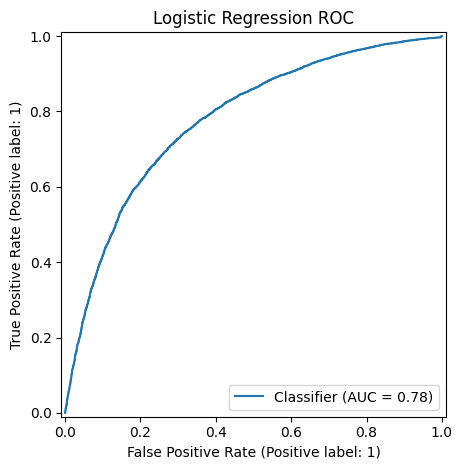


Random Forest performance:
              precision    recall  f1-score   support

           0      0.712     0.724     0.718      8755
           1      0.719     0.707     0.713      8745

    accuracy                          0.715     17500
   macro avg      0.715     0.715     0.715     17500
weighted avg      0.715     0.715     0.715     17500

ROC AUC: 0.7741953548392996


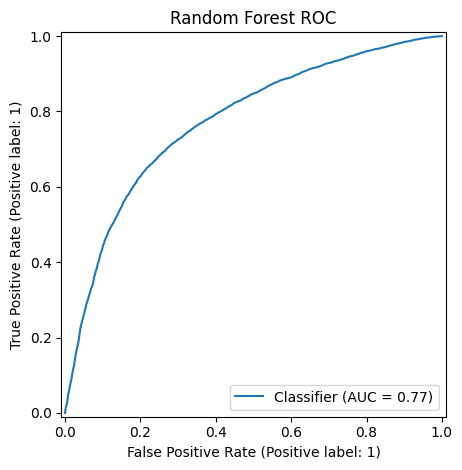

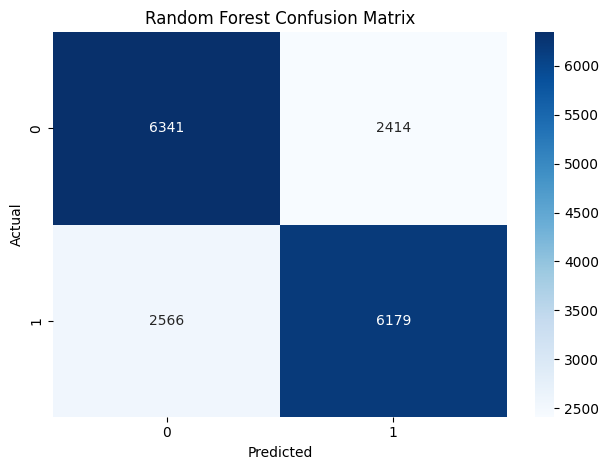

In [43]:
from sklearn.metrics import RocCurveDisplay

# 1) Logistic Regression (interpretable coefficients)
log_reg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("\nLogistic Regression performance:")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.title("Logistic Regression ROC")
plt.tight_layout()
plt.show()

# 2) Random Forest (non-linear, handles interactions)
rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300, random_state=42,
        class_weight="balanced_subsample", max_depth=None
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest performance:")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Random Forest ROC")
plt.tight_layout()
plt.show()

# Confusion matrix visualization for RF
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


## Identify strongest predictors ##

Logistic regression: standardized coefficients


Top predictors (Logistic Regression standardized coefficients):
                              feature      coef  abs_coef
4   ap_hi \n(Systolic blood pressure)  5.994254  5.994254
0                                 age  0.382133  0.382133
6                         cholesterol  0.357822  0.357822
3                              weight  0.231698  0.231698
10                             active -0.079030  0.079030
5   ap_lo\n(Diastolic blood pressure)  0.067919  0.067919
7                       glucose level -0.059067  0.059067
2                              height -0.054953  0.054953
9                                alco -0.041286  0.041286
8                      smoking status -0.033075  0.033075
1                              gender  0.011747  0.011747


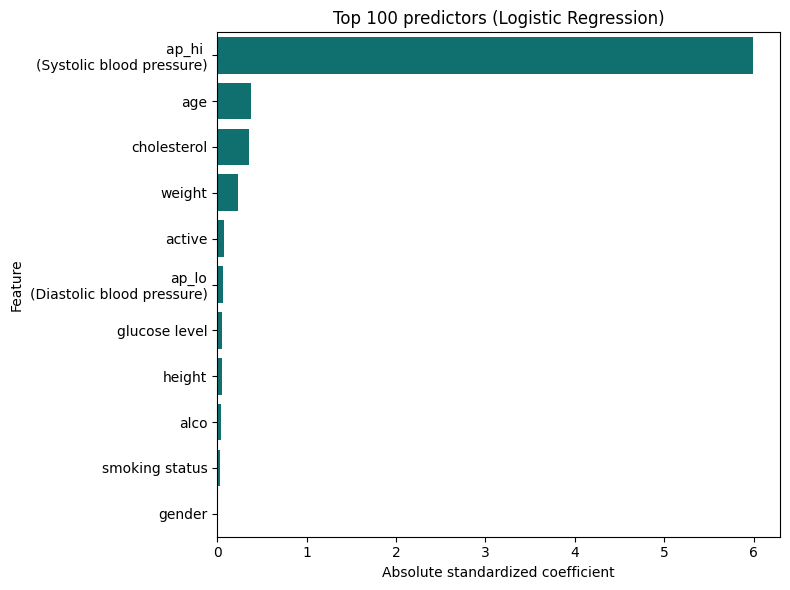

In [45]:
# Extract feature names after preprocessing for LR
# ColumnTransformer + OneHotEncoder expands categorials; we need names
def get_feature_names(preprocess, X_df):
    num_features = preprocess.named_transformers_["num"].named_steps["imputer"].get_feature_names_out(numeric_cols)
    num_features = list(num_features)  # same as numeric_cols

    ohe = preprocess.named_transformers_["cat"].named_steps.get("onehot", None)
    if ohe and len(categorical_cols) > 0:
        cat_features = list(ohe.get_feature_names_out(categorical_cols))
    else:
        cat_features = []

    return num_features + cat_features

lr_features = get_feature_names(log_reg.named_steps["preprocess"], X_train)
lr_coefs = log_reg.named_steps["clf"].coef_[0]

# Sort by absolute magnitude
lr_importance = pd.DataFrame({
    "feature": lr_features,
    "coef": lr_coefs,
    "abs_coef": np.abs(lr_coefs)
}).sort_values("abs_coef", ascending=False)

print("\nTop predictors (Logistic Regression standardized coefficients):")
print(lr_importance.head(100))

plt.figure(figsize=(8,6))
sns.barplot(data=lr_importance.head(100), x="abs_coef", y="feature", color="teal")
plt.xlabel("Absolute standardized coefficient")
plt.ylabel("Feature")
plt.title("Top 100 predictors (Logistic Regression)")
plt.tight_layout()
plt.show()


Random forest


Top predictors (Random Forest feature importance):
                              feature  importance
0                                 age    0.308074
4   ap_hi \n(Systolic blood pressure)    0.174966
3                              weight    0.172041
2                              height    0.155425
5   ap_lo\n(Diastolic blood pressure)    0.090178
6                         cholesterol    0.038213
7                       glucose level    0.016576
1                              gender    0.015407
10                             active    0.012925
8                      smoking status    0.008791
9                                alco    0.007403


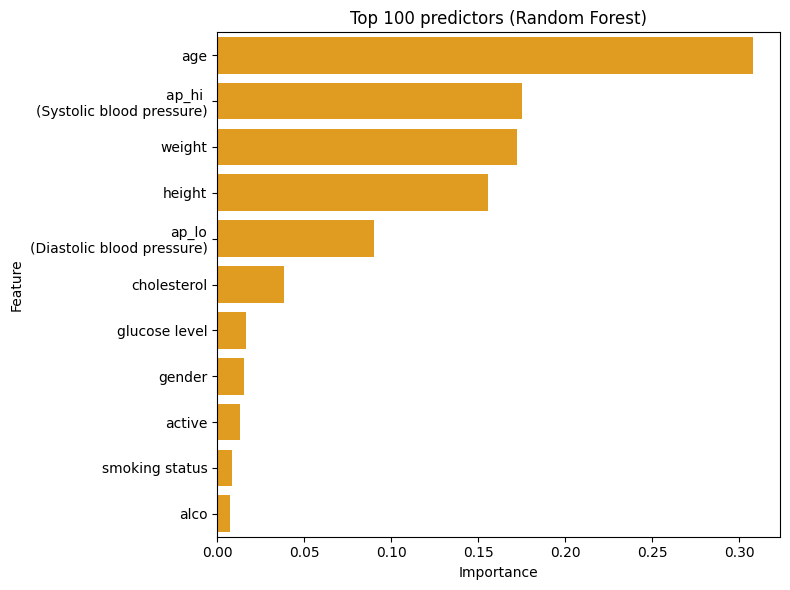

In [47]:
# Extract feature names post-preprocessing for RF
rf_features = get_feature_names(rf.named_steps["preprocess"], X_train)
rf_importances = rf.named_steps["clf"].feature_importances_
rf_imp_df = pd.DataFrame({"feature": rf_features, "importance": rf_importances}) \
    .sort_values("importance", ascending=False)

print("\nTop predictors (Random Forest feature importance):")
print(rf_imp_df.head(100))

plt.figure(figsize=(8,6))
sns.barplot(data=rf_imp_df.head(100), x="importance", y="feature", color="orange")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 100 predictors (Random Forest)")
plt.tight_layout()
plt.show()